In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("dataset\\Family Income and Expenditure.csv")

In [3]:
data['Region'] = data['Region'].astype('category')
data['Main Source of Income'] = data['Main Source of Income'].astype('category')
data['Household Head Sex'] = data['Household Head Sex'].astype('category')
data['Household Head Marital Status'] = data['Household Head Marital Status'].astype('category')
data['Household Head Highest Grade Completed'] = data['Household Head Highest Grade Completed'].astype('category')
data['Household Head Job or Business Indicator'] = data['Household Head Job or Business Indicator'].astype('category')
data['Household Head Occupation'] = data['Household Head Occupation'].astype('category')
data['Household Head Class of Worker'] = data['Household Head Class of Worker'].astype('category')
data['Type of Household'] = data['Type of Household'].astype('category')
data['Type of Building/House'] = data['Type of Building/House'].astype('category')
data['Type of Roof'] = data['Type of Roof'].astype('category')
data['Type of Walls'] = data['Type of Walls'].astype('category')
data['Tenure Status'] = data['Tenure Status'].astype('category')
data['Main Source of Water Supply'] = data['Main Source of Water Supply'].astype('category')
data['Toilet Facilities'] = data['Toilet Facilities'].astype('category')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Total Household Income                         41544 non-null  int64   
 1   Region                                         41544 non-null  category
 2   Total Food Expenditure                         41544 non-null  int64   
 3   Main Source of Income                          41544 non-null  category
 4   Agricultural Household indicator               41544 non-null  int64   
 5   Bread and Cereals Expenditure                  41544 non-null  int64   
 6   Total Rice Expenditure                         41544 non-null  int64   
 7   Meat Expenditure                               41544 non-null  int64   
 8   Total Fish and  marine products Expenditure    41544 non-null  int64   
 9   Fruit Expenditure                      

In [5]:
data

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


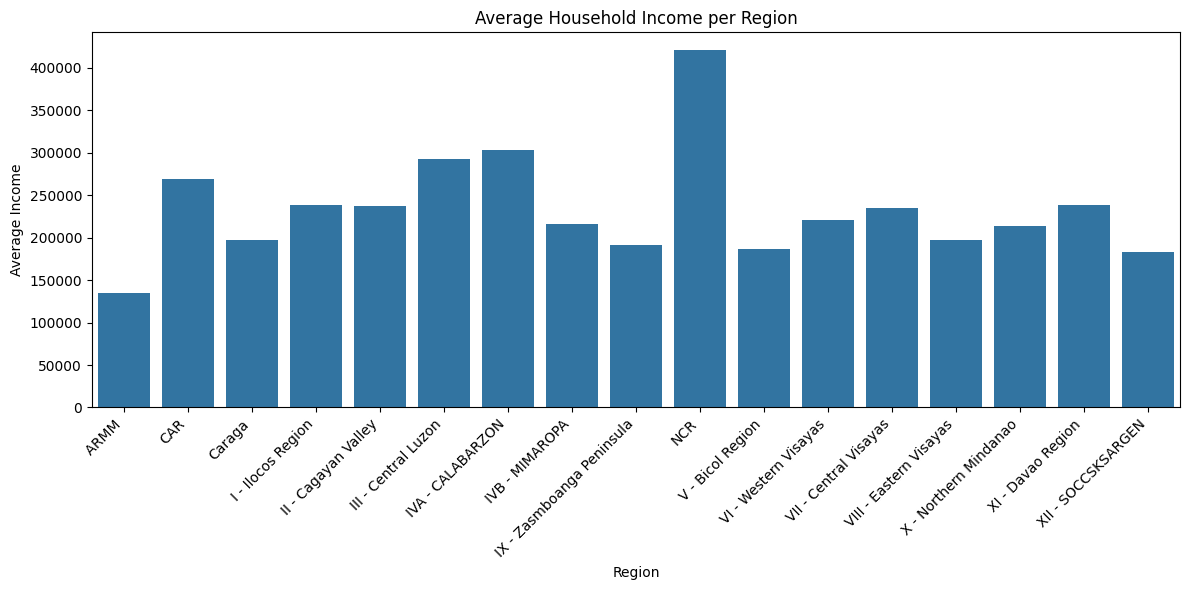

In [6]:
income_by_region = data.groupby('Region')['Total Household Income'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=income_by_region, x='Region', y='Total Household Income')
plt.title('Average Household Income per Region')
plt.xlabel('Region')
plt.ylabel('Average Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h1>INSIGHT</h1>
<h2>1. The region with the highest average household income is NCR, followed by Region IV-A - CALABARZON</h2>

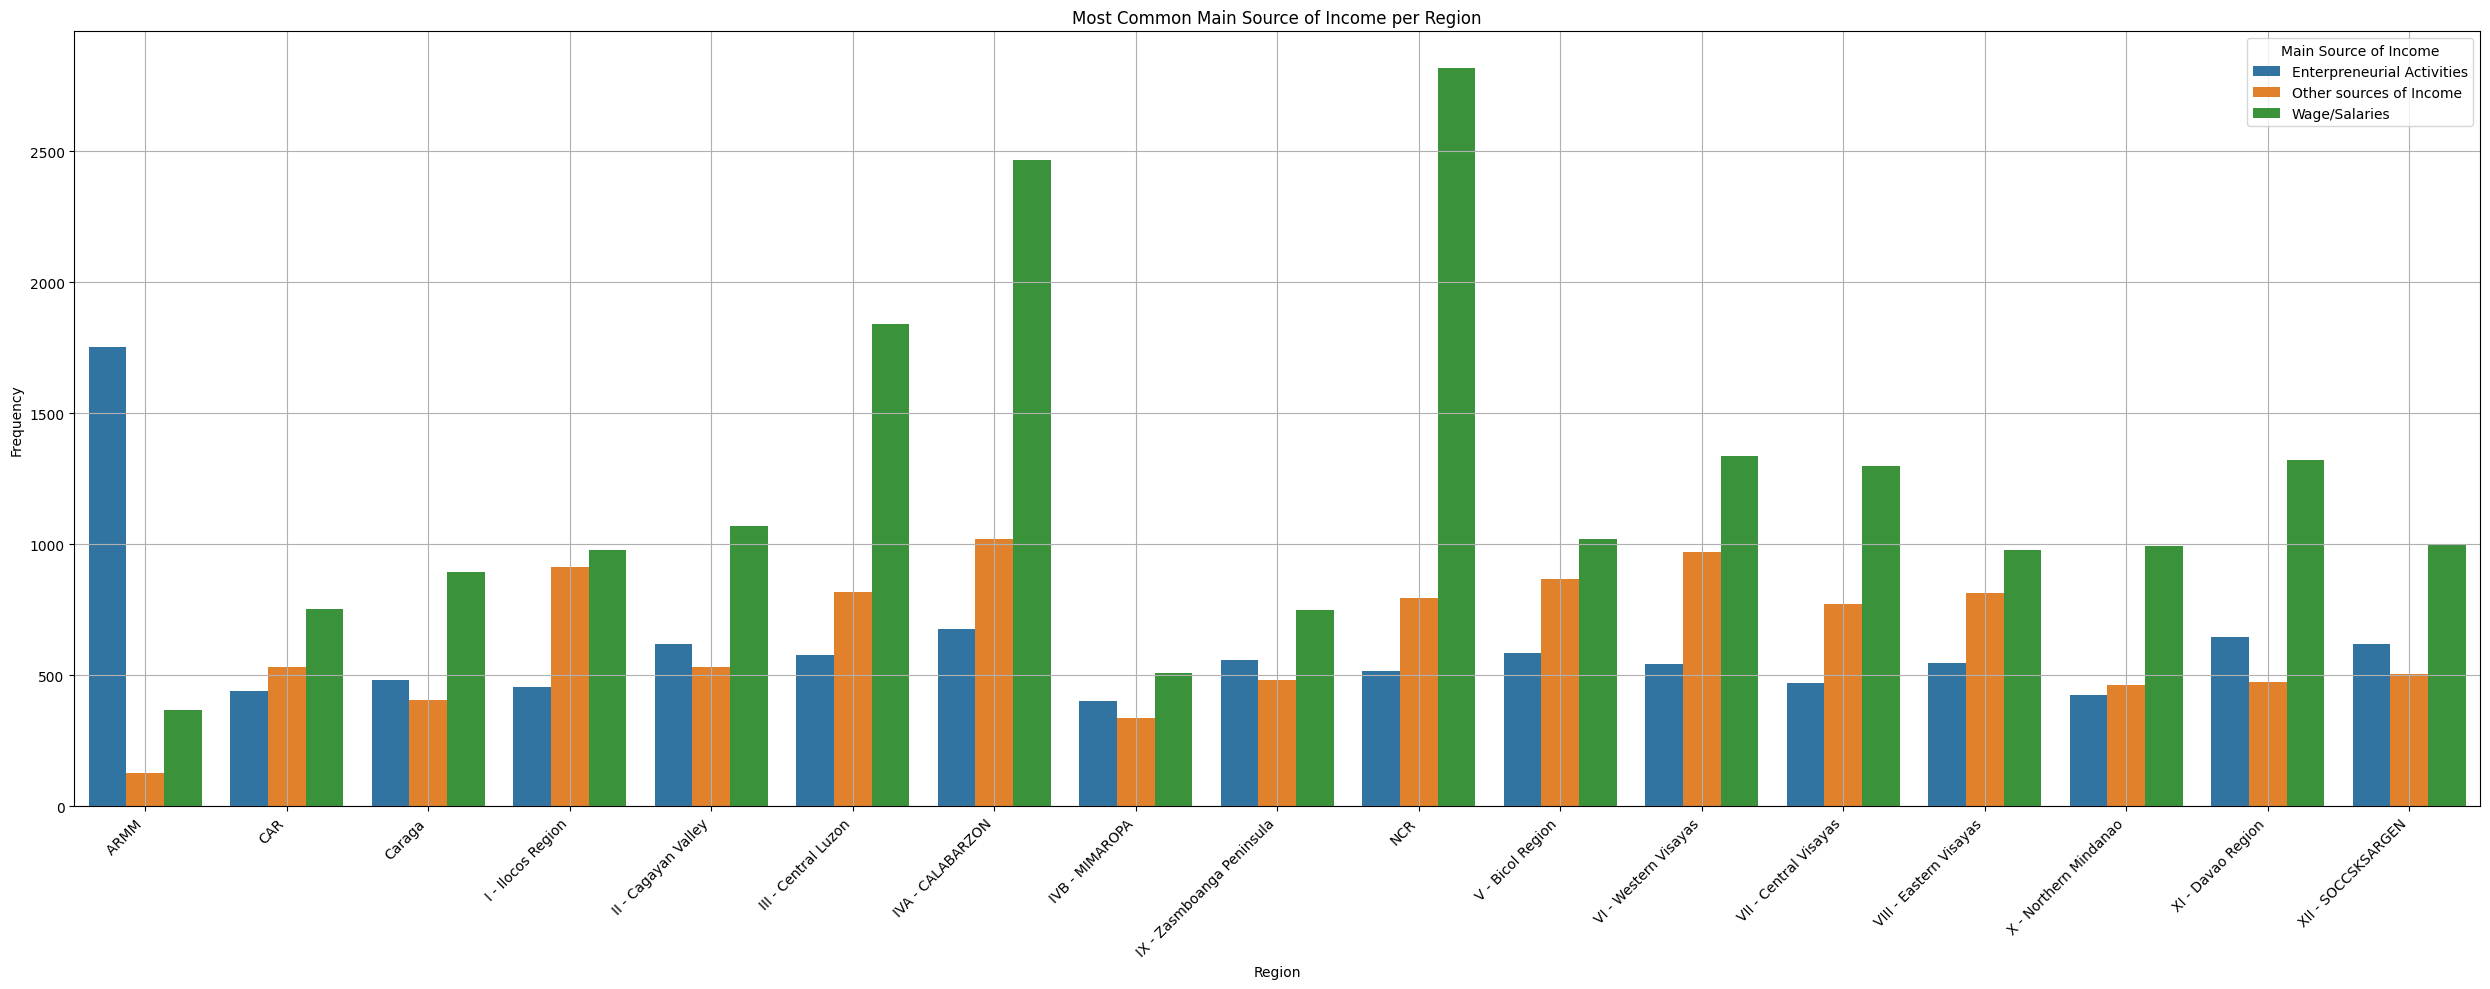

In [7]:
income_counts = data.groupby(['Region', 'Main Source of Income']).size().reset_index(name='Count')
plt.figure(figsize=(25, 10))
sns.barplot(data=income_counts, x='Region', y='Count', hue='Main Source of Income')
plt.title('Most Common Main Source of Income per Region')
plt.ylabel('Frequency')
plt.xlabel('Region')
plt.legend(title='Main Source of Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)

plt.show()

<h1>INSIGHTS</h1>
<h2>2. The ARMM region has the highest number of individuals whose main source of income is entrepreneurial activities.</h2>
<h2>3. NCR has the highest number of salary earners. The reason is that it’s a busy urban area with many businesses and workplaces where people can find regular jobs.</h2>

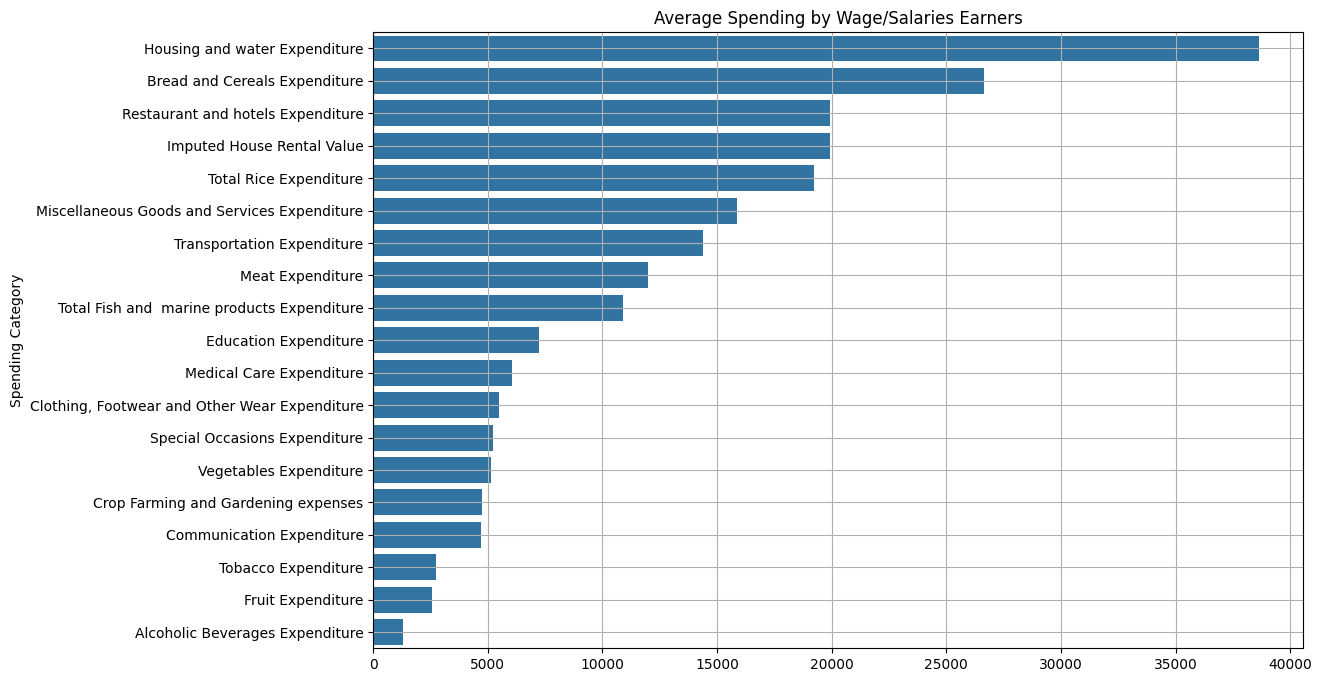

In [8]:
wage_earners = data[data['Main Source of Income'] == 'Wage/Salaries']
expenditure_columns = [
    'Bread and Cereals Expenditure', 'Total Rice Expenditure', 'Meat Expenditure',
    'Total Fish and  marine products Expenditure', 'Fruit Expenditure', 'Vegetables Expenditure',
    'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure',
    'Clothing, Footwear and Other Wear Expenditure', 'Housing and water Expenditure',
    'Imputed House Rental Value', 'Medical Care Expenditure', 'Transportation Expenditure',
    'Communication Expenditure', 'Education Expenditure',
    'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure',
    'Crop Farming and Gardening expenses'
]
wage_spending = wage_earners[expenditure_columns].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=wage_spending.values, y=wage_spending.index)

plt.title('Average Spending by Wage/Salaries Earners')
plt.ylabel('Spending Category')
plt.grid(True)
plt.show()

<h2>4. People who earn from wages use a lot of their income on housing and water, bread and cereals, and also restaurant and hotel costs.</h2>

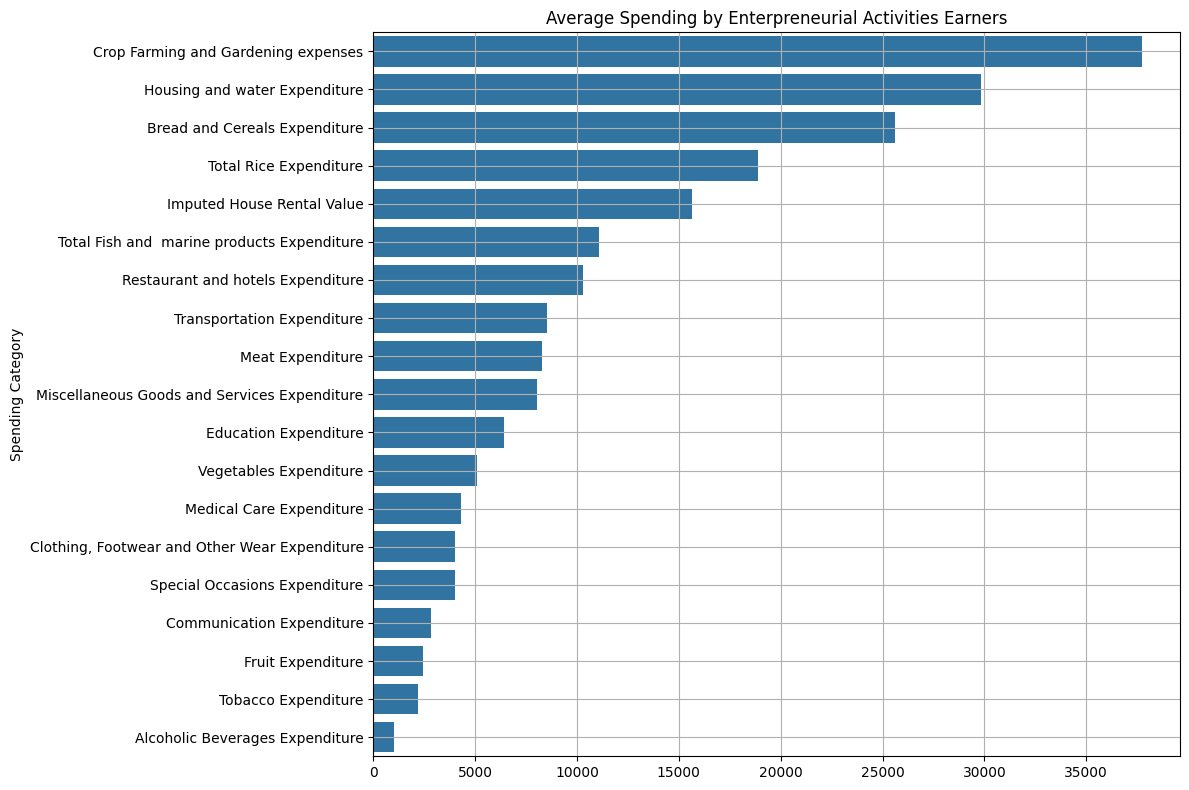

In [9]:
wage_earners = data[data['Main Source of Income'] == 'Enterpreneurial Activities']
expenditure_columns = [
    'Bread and Cereals Expenditure', 'Total Rice Expenditure', 'Meat Expenditure',
    'Total Fish and  marine products Expenditure', 'Fruit Expenditure', 'Vegetables Expenditure',
    'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure',
    'Clothing, Footwear and Other Wear Expenditure', 'Housing and water Expenditure',
    'Imputed House Rental Value', 'Medical Care Expenditure', 'Transportation Expenditure',
    'Communication Expenditure', 'Education Expenditure',
    'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure',
    'Crop Farming and Gardening expenses'
]
wage_spending = wage_earners[expenditure_columns].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=wage_spending.values, y=wage_spending.index)

plt.title('Average Spending by Enterpreneurial Activities Earners')
plt.ylabel('Spending Category')
plt.tight_layout()
plt.grid(True)
plt.show()

<h2>5. People who earn from entrepreneurial activities spend most of their income on crop farming and gardening, housing and water, and basic food like bread and cereals.</h2>

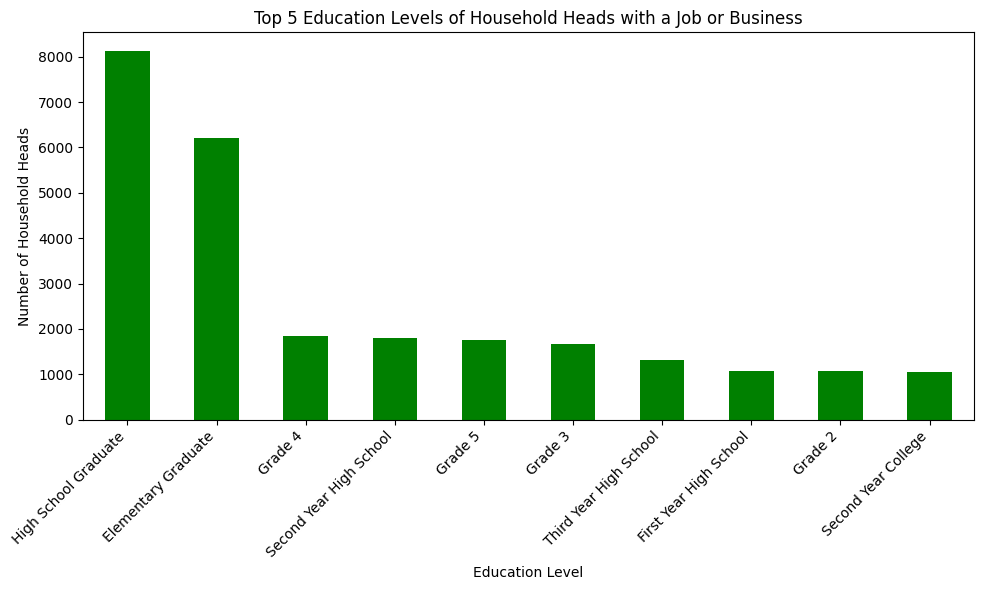

In [10]:
withjob_counts = data[data['Household Head Job or Business Indicator'] == 'With Job/Business']['Household Head Highest Grade Completed'].value_counts().head(10)
plt.figure(figsize=(10, 6))
withjob_counts.plot(kind='bar', color='green')
plt.title('Top 5 Education Levels of Household Heads with a Job or Business')
plt.xlabel('Education Level')
plt.ylabel('Number of Household Heads')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h2>6. Data shows that most employed household heads are high school graduates.</h2>

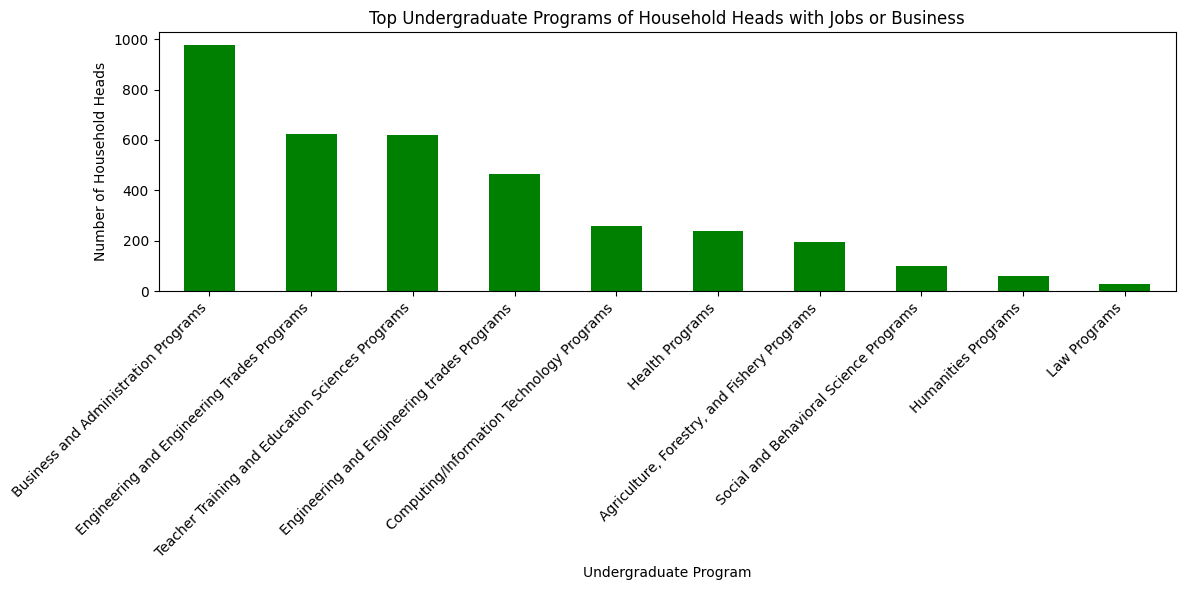

In [11]:
# Step 1: Filter household heads WITH job or business
with_job = data[data['Household Head Job or Business Indicator'] == 'With Job/Business']

# Step 2: Define a list of undergraduate programs
undergrad_programs = [
    'Business and Administration Programs',
    'Teacher Training and Education Sciences Programs',
    'Engineering and Engineering Trades Programs',
    'Engineering and Engineering trades Programs',  # typo included just in case
    'Health Programs',
    'Computing/Information Technology Programs',
    'Agriculture, Forestry, and Fishery Programs',
    'Law Programs',
    'Arts Programs',
    'Environmental Protection Programs',
    'Journalism and Information Programs',
    'Social and Behavioral Science Programs',
    'Basic Programs',
    'Life Sciences Programs',
    'Physical Sciences Programs',
    'Veterinary Programs',
    'Social Services Programs',
    'Mathematics and Statistics Programs',
    'Humanities Programs'
]

# Step 3: Filter only rows where education is in that list
with_job_undergrad = with_job[with_job['Household Head Highest Grade Completed'].isin(undergrad_programs)]

# Step 4: Count and sort
program_counts = with_job_undergrad['Household Head Highest Grade Completed'].value_counts().head(10)

# Step 5: Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
program_counts.plot(kind='bar', color='green')
plt.title('Top Undergraduate Programs of Household Heads with Jobs or Business')
plt.xlabel('Undergraduate Program')
plt.ylabel('Number of Household Heads')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h2>7. The data shows that while many employed people finished high school, a large number of jobless or business-less individuals also graduated high school.</h2>

In [12]:
data['Total Food Expenditure'].corr(data['Total Number of Family members'])

np.float64(0.4181874754947976)

<h2>8.As family size increases, food spending also increases. However, some large families still spend less on food compared to smaller families.</h2>

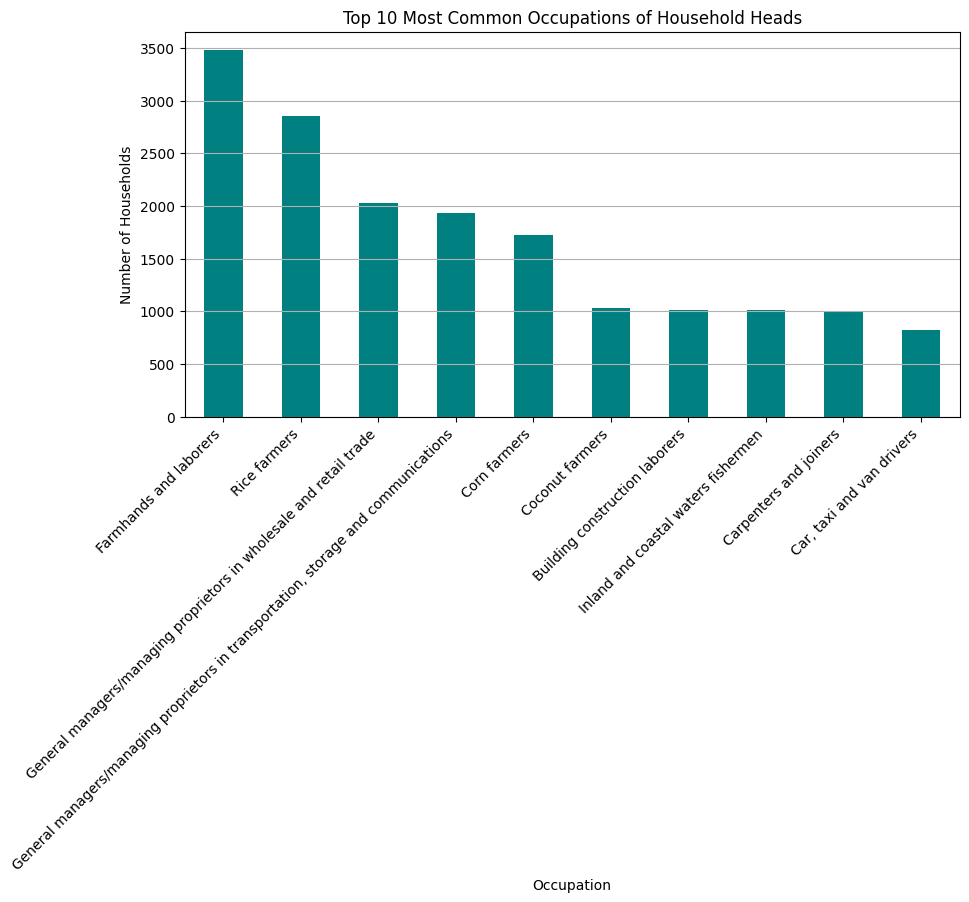

In [13]:
# Count the top occupations
top_occupations = data["Household Head Occupation"].value_counts().head(10)

# Plot
top_occupations.plot(kind="bar", figsize=(10, 5), color="teal")
plt.title("Top 10 Most Common Occupations of Household Heads")
plt.xlabel("Occupation")
plt.ylabel("Number of Households")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<h2>10. Most household heads in the dataset work as farmers and laborers</h2>

In [14]:
data['Total Household Income'].corr(data['Total number of family members employed'])

np.float64(0.21109909350556177)

<h2>As the number of employed family members increases, household income also tends to increase — but the connection isn’t very strong. Other factors may still play a bigger role in determining income.</h2>

In [15]:
data['Type of Building/House'].value_counts()

Type of Building/House
Single house                                   39069
Multi-unit residential                          1329
Duplex                                          1084
Commercial/industrial/agricultural building       51
Institutional living quarter                       9
Other building unit (e.g. cave, boat)              2
Name: count, dtype: int64

In [16]:
data

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [17]:

data['Total Assets Owned'] = (
    data['Number of Television'] +
    data['Number of CD/VCD/DVD'] +
    data['Number of Component/Stereo set'] +
    data['Number of Refrigerator/Freezer'] +
    data['Number of Washing Machine'] +
    data['Number of Airconditioner'] +
    data['Number of Car, Jeep, Van'] +
    data['Number of Landline/wireless telephones'] +
    data['Number of Cellular phone'] +
    data['Number of Personal Computer'] +
    data['Number of Stove with Oven/Gas Range'] +
    data['Number of Motorized Banca'] +
    data['Number of Motorcycle/Tricycle']
)
correlation = data['Total Household Income'].corr(data['Total Assets Owned'])
print("Correlation between Total Assets and Income:", correlation)

Correlation between Total Assets and Income: 0.6895677352573083


<h1>Insight 1: Average Food Expenditure by Region</h1>

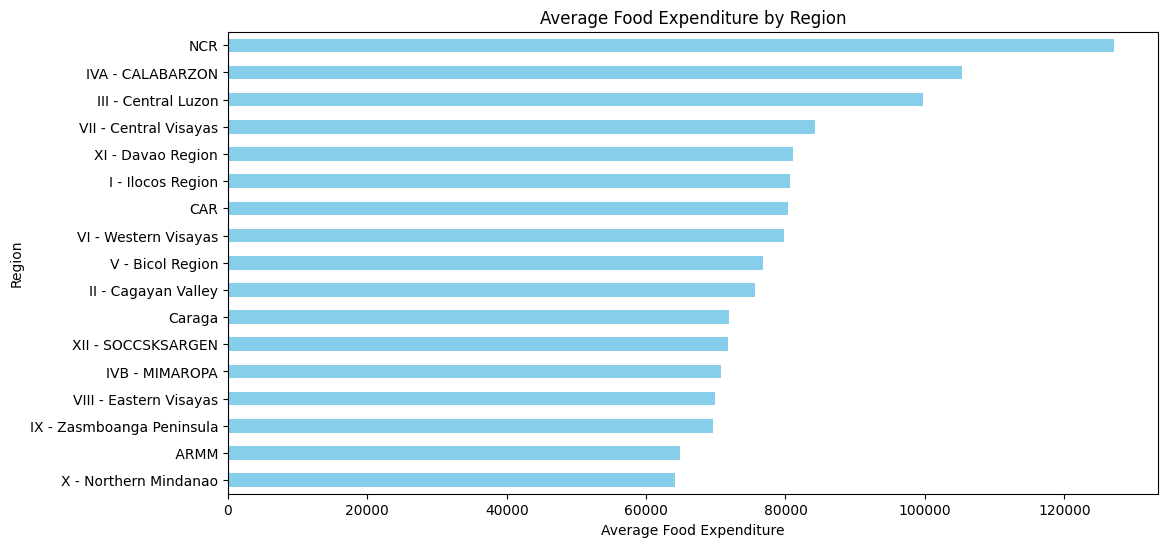

In [18]:
plt.figure(figsize=(12, 6))
region_avg = data.groupby('Region')['Total Food Expenditure'].mean().sort_values()
region_avg.plot(kind='barh', color='skyblue')
plt.title('Average Food Expenditure by Region')
plt.xlabel('Average Food Expenditure')
plt.show()

<h1>The region with the highest average food expenditure are NCR which is 127, 080.46.</h1>

<h1>Insight 2: Top 10 Regions by Average Total Household Income</h1>

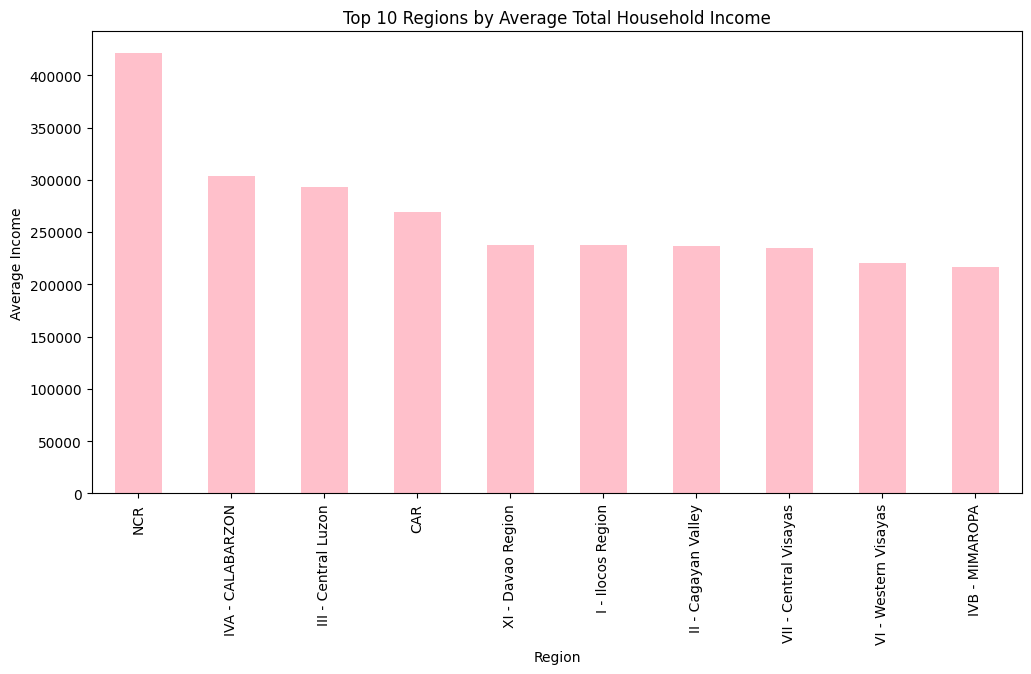

In [19]:
plt.figure(figsize=(12, 6))
income_by_region = data.groupby('Region')['Total Household Income'].mean().sort_values(ascending=False).head(10)
income_by_region.plot(kind='bar', color='pink')
plt.title('Top 10 Regions by Average Total Household Income')
plt.ylabel('Average Income')
plt.show()

<h1>The top 10 region with highest average of total household income are NCR, IVA - CALABARZON, III - Central Luzon, CAR, XI - Davao Region, I - Ilocos Region, II - Cagayan Valley, VII - Central Visayas, VI - Western Visayas, and IVB - MIMAROPA, </h1>

<h1>Insight 3: Proportion of Main Source of Income</h1>

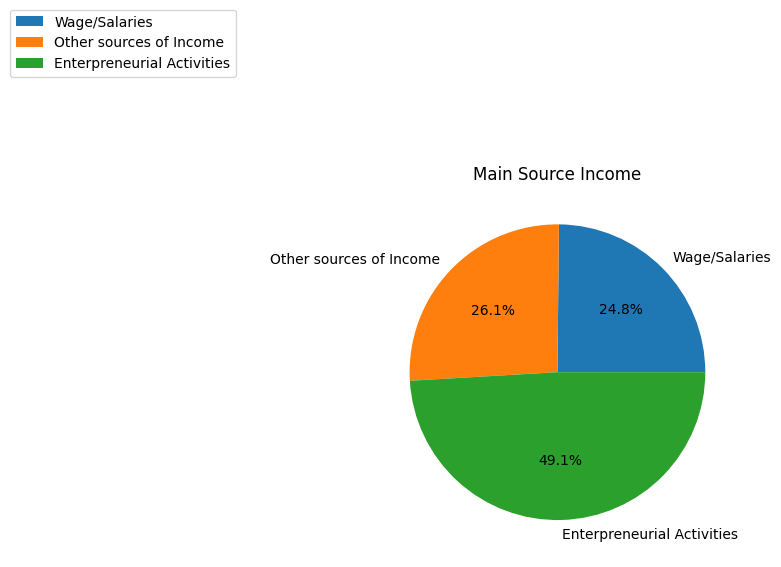

In [20]:
wage_salaries = data.groupby(['Main Source of Income']).size()

plt.pie(wage_salaries, autopct='%1.1f%%', labels=data['Main Source of Income'].unique())
plt.legend(loc='upper left', bbox_to_anchor=(-1, 1.5))
plt.title('Main Source Income')
plt.show()

<h1>The main source of income that has highest percentage is Enterpreneurial Activities which is 49.1%.</h1>

<h1>Insight 4: Average Rice Expenditure by Region</h1>

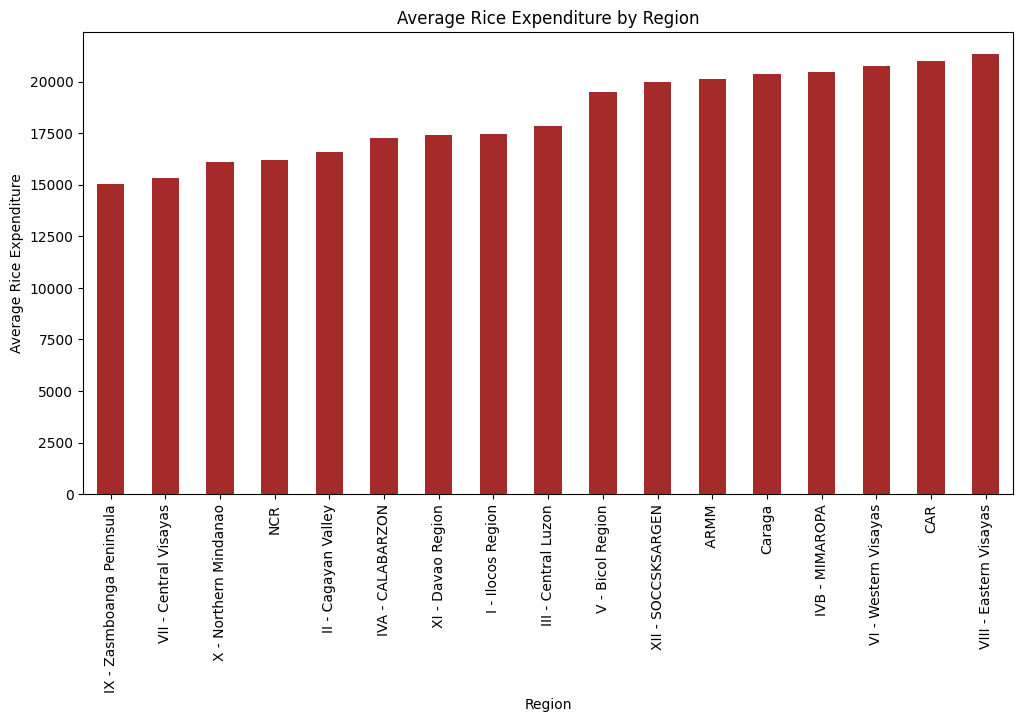

In [21]:
plt.figure(figsize=(12, 6))
rice_expenditure_region = data.groupby('Region')['Total Rice Expenditure'].mean().sort_values()
rice_expenditure_region.plot(kind='bar', color='brown')
plt.title('Average Rice Expenditure by Region')
plt.ylabel('Average Rice Expenditure')
plt.show()

In [22]:
rice_expenditure_region

Region
IX - Zasmboanga Peninsula    15047.814318
VII - Central Visayas        15318.150335
X - Northern Mindanao        16110.600954
NCR                          16195.817918
II - Cagayan Valley          16563.448851
IVA - CALABARZON             17260.889957
XI - Davao Region            17408.363451
I - Ilocos Region            17439.663543
III - Central Luzon          17846.424158
V - Bicol Region             19509.339806
XII - SOCCSKSARGEN           19988.301131
 ARMM                        20108.128114
Caraga                       20369.699214
IVB - MIMAROPA               20460.674139
VI - Western Visayas         20756.341284
CAR                          20975.441159
VIII - Eastern Visayas       21334.336757
Name: Total Rice Expenditure, dtype: float64

<h1>The region with the highest average of rice expenditure is Region VIII - Eastern Visayas with an average of 21334.336757 and the region with lowest average of rice expenditure is Region IX - Zamboaga Peninsula with an average of 15047.814318</h1>

<h1>Insight 5: Number of Televisions Owned</h1>

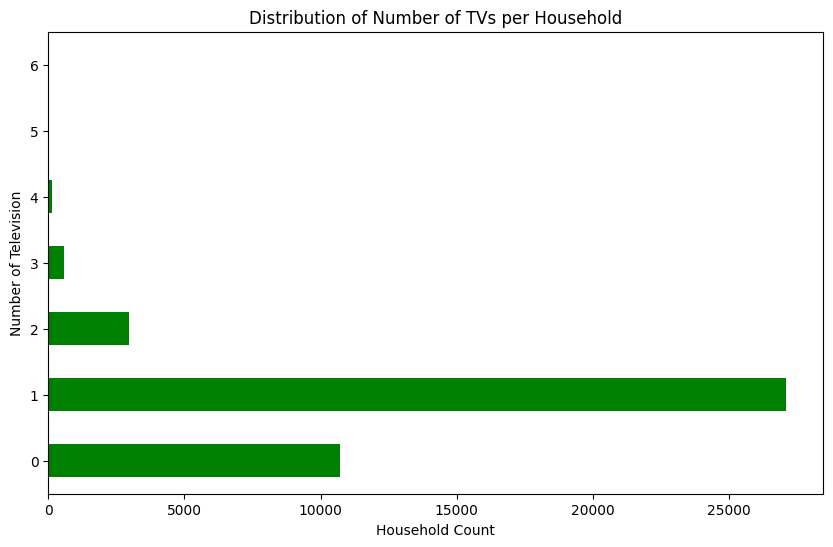

In [23]:
plt.figure(figsize=(10, 6))
data['Number of Television'].value_counts().sort_index().plot(kind='barh', color='green')

plt.title('Distribution of Number of TVs per Household')
plt.xlabel('Household Count')
plt.ylabel('Number of Television')
plt.show()



<h1>The common number of televisions that they have is 1 television and lowest number of television that they have is 4 televisions</h1>

<h1>Insight 6: Tenure Status Distribution</h1>

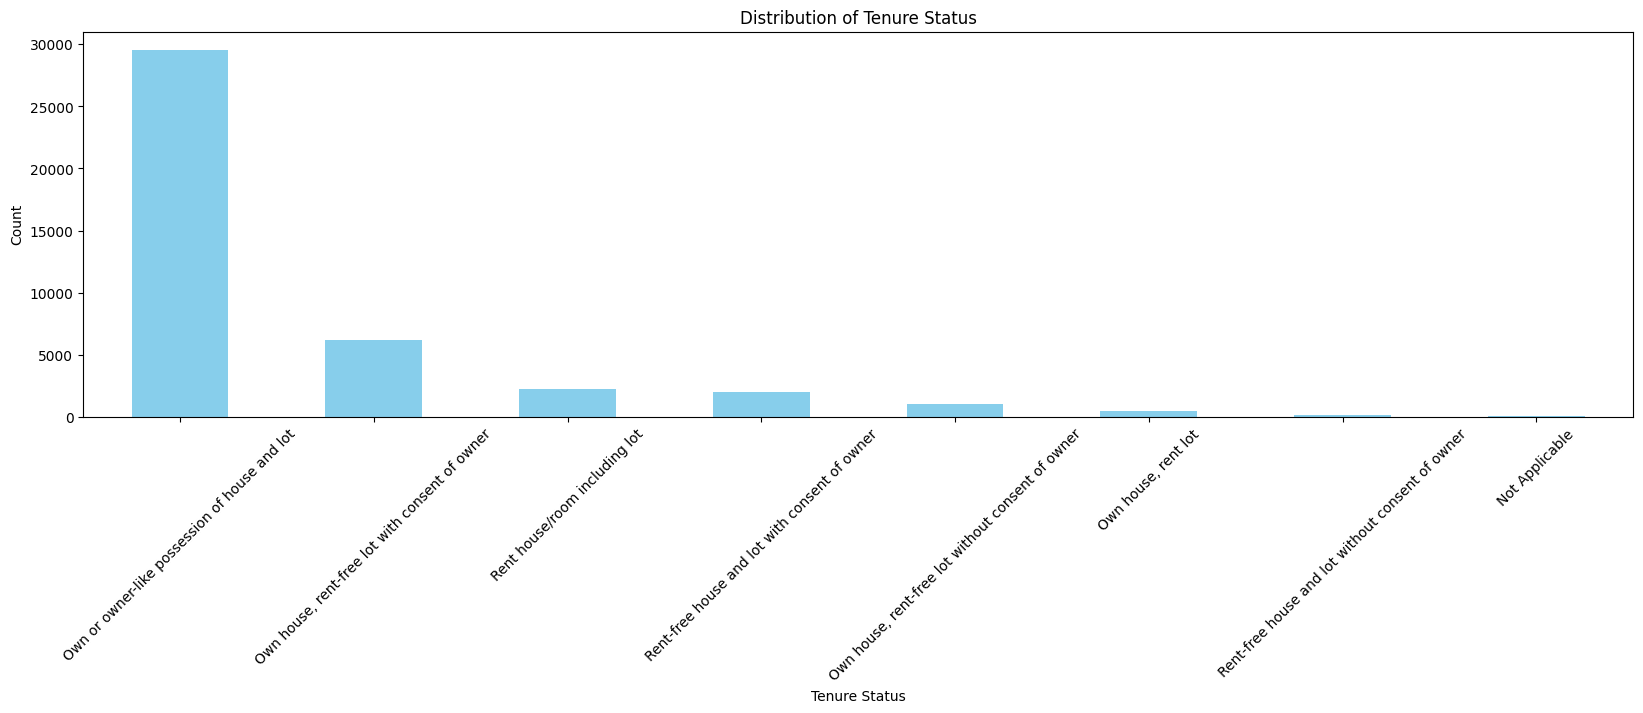

In [24]:
plt.figure(figsize=(20, 5))
data['Tenure Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Tenure Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [25]:
data['Tenure Status'].value_counts()

Tenure Status
Own or owner-like possession of house and lot        29541
Own house, rent-free lot with consent of owner        6165
Rent house/room including lot                         2203
Rent-free house and lot with consent of owner         2014
Own house, rent-free lot without consent of owner      995
Own house, rent lot                                    425
Rent-free house and lot without consent of owner       128
Not Applicable                                          73
Name: count, dtype: int64

<h1>The most common tenure status among households is "Own or owner-like possession of house and lot," with 29,541 households. This indicates that a large portion of families have secure ownership of their homes and the land they occupy.</h1>

<h1>Insight 7: Region with Most Households Without a Personal Computer</h1>

In [26]:
no_personal_computers = data[data['Number of Personal Computer'] == 0]
region_counts = no_personal_computers['Region'].value_counts()
region_counts

Region
IVA - CALABARZON             2909
NCR                          2583
VI - Western Visayas         2406
III - Central Luzon          2354
 ARMM                        2170
V - Bicol Region             2083
VII - Central Visayas        2066
VIII - Eastern Visayas       2019
XI - Davao Region            1969
XII - SOCCSKSARGEN           1838
I - Ilocos Region            1806
II - Cagayan Valley          1801
X - Northern Mindanao        1567
IX - Zasmboanga Peninsula    1537
Caraga                       1508
CAR                          1317
IVB - MIMAROPA               1055
Name: count, dtype: int64

<h1>The region with the highest number of households without a personal computer is IVA - CALABARZON with 2, 909 households</h1>

<h1>Insight 8: Correlation between Landline/Wireless Telephones and Cellular Phone</h1>

In [27]:
corr = data['Number of Landline/wireless telephones'].corr(data['Number of Cellular phone'])
corr

np.float64(0.15264882270301364)

<h1>There is a positive correlation between Number of Landline/wireless telephones and Number of Cellular phone</h1>

<h1>Insight 9: Top 5 Regions by Total Number of Family Members</h1>

In [28]:
family_members_by_region = data.groupby('Region')['Total Number of Family members'].sum()

top_5_regions = family_members_by_region.sort_values(ascending=False).head(5)
top_5_regions


Region
NCR                     18723
IVA - CALABARZON        18528
III - Central Luzon     14952
VI - Western Visayas    12915
 ARMM                   12832
Name: Total Number of Family members, dtype: int64

<h1>The region with the highest total number of family members is NCR (National Capital Region), with a total of 18,723 family members. It is closely followed by Region IVA – CALABARZON, which has 18,528 family members. Region III – Central Luzon ranks third with 14,952 family members, while Region VI – Western Visayas comes in fourth with 12,915. Lastly, ARMM (Autonomous Region in Muslim Mindanao) holds the fifth spot, with a total of 12,832 family members.</h1>

<h1>Insight 10: Average Medical Expenditure Per Region</h1>

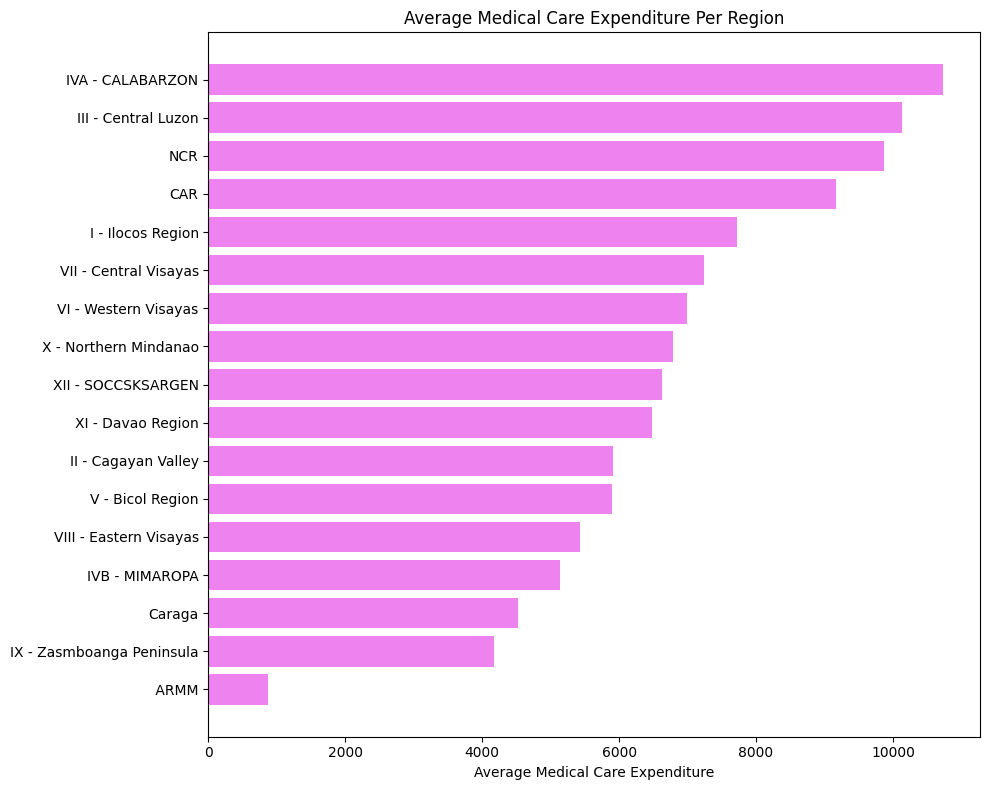

In [29]:
avg_medical_exp_by_region = data.groupby('Region')['Medical Care Expenditure'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(avg_medical_exp_by_region.index, avg_medical_exp_by_region.values, color='violet')
plt.xlabel('Average Medical Care Expenditure')
plt.title('Average Medical Care Expenditure Per Region')
plt.tight_layout()
plt.show()